# Impurity phonon

In [1]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

## parameter

In [2]:
L = 128 # discretization of the 1D BZ (in phonon sampling)
eps = -3 # bare electronic obital energy; negative -> ground state has this orbital filled
M0 = 1. # e-ph coupling; equals to 2 -> g=1

tph = 0 # phonon band width; Einsten model: tph = 0
wE = 2 # mean phonon frequency (for optical mode)

is_acoustic = False #optical vs acoustic phonons
noise_strength = 0.1 # random noise: natural range is from 0 to 1 

eta = 0.01

tMin = 0
tMax = 5/eta
tstep = 10*eta
tCnt = int(1+(tMax-tMin)/tstep)

tList = np.linspace(tMin,tMax,tCnt)

tmp0 = np.pi*np.linspace(-np.pi, np.pi, L+1)
qList = (tmp0[:-1] + tmp0[1:])/2

## function

In [3]:
def w(q):
  if is_acoustic:
    ret = tph*np.sin(np.abs(q)/2)
  else:
    ret = wE - tph*np.cos(q)
  return ret

def M(q):
  if is_acoustic:
    ret = M0/np.sqrt(L)*np.abs(q/(2*np.pi))
  else:
    ret = M0/np.sqrt(L)
  return ret

def g(q):
  return (M(q)/w(q))**2

def G(t):
  tmp0 = [g(q)*(np.exp(-1j*w(q)*t)-1) for q in qList]
  ret = -1j*np.exp(np.sum(tmp0))*np.exp(1j*Delta*t)
  return ret

## main calculation

In [4]:
gEff = np.sum([g(q) for q in qList])
Delta = eps - np.sum([M(q)**2/w(q) for q in qList])
wList = np.array([w(q) for q in qList])
gList = np.array([g(q) for q in qList])

GList = np.array([np.sqrt(tCnt)*(G(t)*np.exp(-eta*t)+np.random.rand()*noise_strength) for t in tList])
Aw = -np.imag(scipy.fft.ifft(GList))/np.pi

## plotting

g effective =  0.25


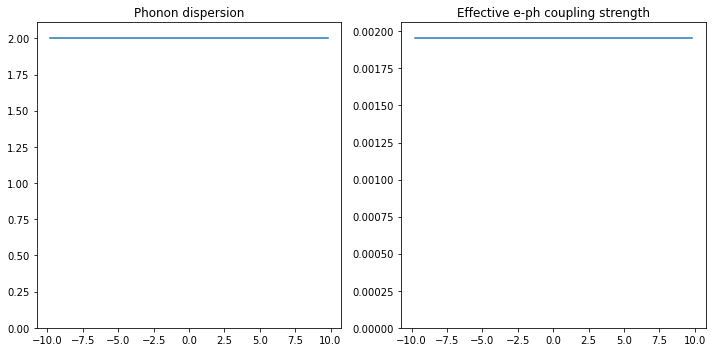

In [5]:
print("g effective = ", round(gEff,2))

fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.plot(qList, wList)
ax0.set_ylim(0)
ax0.set_title("Phonon dispersion")

ax1.plot(qList, gList)
ax1.set_title("Effective e-ph coupling strength")
ax1.set_ylim(0)
fig.tight_layout()

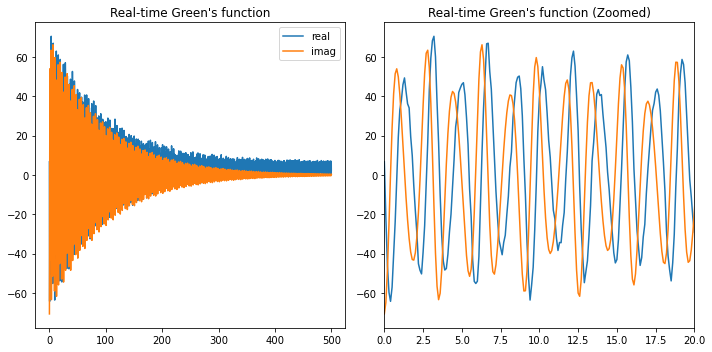

In [6]:
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.plot(tList, GList.real, label='real')
ax0.plot(tList, GList.imag, label='imag')
ax0.set_title("Real-time Green's function")
ax0.legend()

ax1.plot(tList, GList.real, label='real')
ax1.plot(tList, GList.imag, label='imag')
ax1.set_title("Real-time Green's function (Zoomed)")
ax1.set_xlim([0,20])
fig.tight_layout()

g effective =  0.25


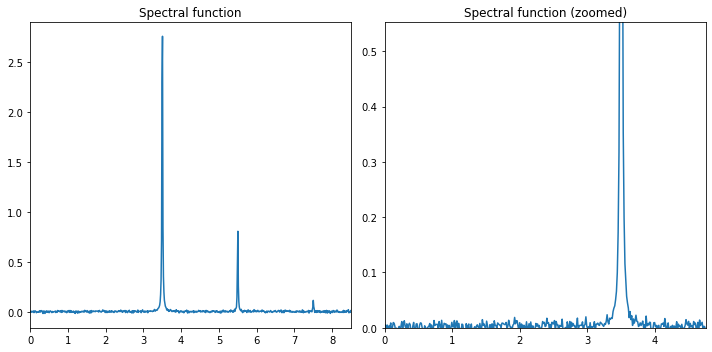

In [7]:
print("g effective = ", round(gEff,2))

fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(10, 5))
xdata = np.array([w*(2*np.pi/tCnt)/tstep for w in range(tCnt)])
ax0.plot(xdata, Aw)
ax0.set_xlim([0, np.abs(Delta)+20*gEff])
ax0.set_title("Spectral function")

ax1.plot(xdata, Aw)
ax1.set_xlim([0,np.abs(Delta)+5*gEff])
ax1.set_ylim([0,0.2*max(Aw)])
ax1.set_title("Spectral function (zoomed)")
fig.tight_layout()